In [1]:
# !pip install torch torchvision

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 追記
import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

# tfがエラーはかないため
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Pixiedust database opened successfully


In [7]:
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST



In [8]:
data_folder = "~/data"
BATCH_SIZE = 8

mnist_data = MNIST(data_folder, train=True, download = True, transform= transforms.ToTensor())

data_loader = DataLoader(mnist_data, batch_size=BATCH_SIZE, shuffle=False)



Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw


Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw


Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw
Processing...
Done!


In [9]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()

print(len(images))
print(len(labels))


8
8


(1, 28, 28)


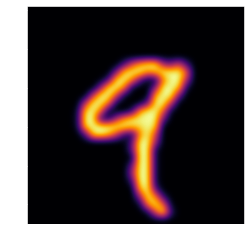

ラベル： tensor(9)


In [11]:
location = 4
data = images[location].numpy()
print(data.shape)

reshaped_data = data.reshape(28, 28)
plt.imshow(reshaped_data, cmap="inferno", interpolation="bicubic")
plt.show()
print("ラベル：", labels[location])

In [14]:
# 学習データ

train_data_with_labels = MNIST(data_folder, train= True, download=True, transform= transforms.ToTensor())

train_data_loader = DataLoader(train_data_with_labels, batch_size= BATCH_SIZE, shuffle=True)

test_data_with_labels = MNIST(data_folder, train=False, download=True, transform= transforms.ToTensor())

test_data_loader = DataLoader(test_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)



In [15]:
from torch.autograd import Variable
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28 * 28, 100)
        
        self.layer2 = nn.Linear(100, 50)
        
        self.layer3 = nn.Linear(50, 10)
        
    def forward(self, input_data):
        input_data = input_data.view(-1, 28*28)
        
        input_data = self.layer1(input_data)
        input_data = self.layer2(input_data)
        input_data = self.layer3(input_data)
        return input_data


In [16]:
model = MLP()

In [18]:

import torch.optim as optimizer
lossResult = nn.CrossEntropyLoss()

optimizer = optimizer.SGD(model.parameters(), lr=0.01)


In [22]:
MAX_EPOCH = 4

for epoch in range(MAX_EPOCH):
    total_loss = 0.0
    for i, data in enumerate(train_data_loader):
        
        train_data, teacher_labels = data
        
        train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)

        optimizer.zero_grad()

        outputs = model(train_data)
        
        loss = lossResult(outputs, teacher_labels)
        loss.backward()
        
#         breakpoint()
        
        optimizer.step()
        
        total_loss += loss.data.item()
        
        if i % 2000 == 1999:
            print("学習進捗:[%d, %d] 学習誤差(loss): %.3f" % (epoch+1, i+1, total_loss/ 2000)   )
            total_loss = 0.0
            
print("学習終了")

学習進捗:[1, 2000] 学習誤差(loss): 0.846
学習進捗:[1, 4000] 学習誤差(loss): 0.378
学習進捗:[1, 6000] 学習誤差(loss): 0.348
学習進捗:[2, 2000] 学習誤差(loss): 0.321
学習進捗:[2, 4000] 学習誤差(loss): 0.314
学習進捗:[2, 6000] 学習誤差(loss): 0.300
学習進捗:[3, 2000] 学習誤差(loss): 0.288
学習進捗:[3, 4000] 学習誤差(loss): 0.308
学習進捗:[3, 6000] 学習誤差(loss): 0.299
学習進捗:[4, 2000] 学習誤差(loss): 0.286
学習進捗:[4, 4000] 学習誤差(loss): 0.286
学習進捗:[4, 6000] 学習誤差(loss): 0.291
学習終了


In [25]:
import torch

total = 0

count_when_correct = 0

for data in test_data_loader:
    
    test_data, teacher_labels = data
    
    results = model(Variable(test_data))
    
    _, predicted = torch.max(results.data, 1)
    
    total += teacher_labels.size(0)
    count_when_correct += (predicted == teacher_labels).sum()
    
print("count_whern_correct: %d/%d = %f " % (count_when_correct, total, int(count_when_correct)/ int(total)))
print("totla:%d" % (total))

print("正解率:%d / %d = %f" %(count_when_correct, total, int(count_when_correct)/ int(total)) )



count_whern_correct: 9158/10000 = 0.915800 
totla:10000
正解率:9158 / 10000 = 0.915800


ラベル: tensor(9)


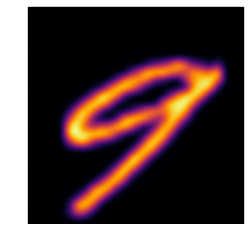

In [32]:
test_iterator = iter(test_data_loader)

test_data, teacher_labels = test_iterator.next()

results = model(Variable(test_data))
_, predicted_label = torch.max(results.data, 1)

location = 1
plt.imshow(test_data[location].numpy().reshape(28,28), cmap="inferno", interpolation = "bicubic")

print("ラベル:", predicted_label[location])

